In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [3]:
class Perceptron(object):

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        # Темп обучения (от О до 1)
        self.n_iter = n_iter
        # Количество итераций (уроков)
        '''Выполнить подгонку модели под тренировочные данные.
Параметры
X - тренировочные данные: массив, размерность -
X[n_sam ples, n_features],
где
n_samples - число образцов,
п _features - число признаков,
y - Целевые значения: массив, размерность - y[n_samples]
Возвращэет
self: object'''
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) # w : одномерный массив -
        # веса после обучения
        self.errors_ = [] # errors : список - ошибок
    # классификации в каждой эпохе
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    '''Вернуть метку класса после единичного скачка'''
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
setosa = iris_df[iris_df['species'] == 'setosa']
versicolor = iris_df[iris_df['species'] == 'versicolor']
virginica = iris_df[iris_df['species'] == 'virginica']

In [5]:
X = iris_df.iloc[0:100,[0,2]].values
Y = iris_df.iloc[0:100,4].values
Y = np.where(Y=='setosa',-1,1)

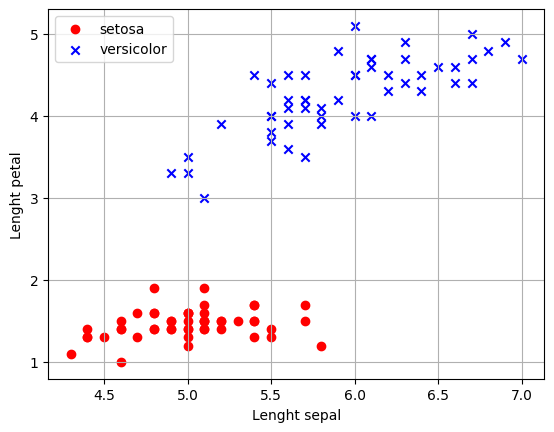

In [6]:
plt.scatter(X[0:50,0],X[0:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('Lenght sepal')
plt.ylabel('Lenght petal')
plt.legend(loc='upper left')
plt.grid()
plt.show()


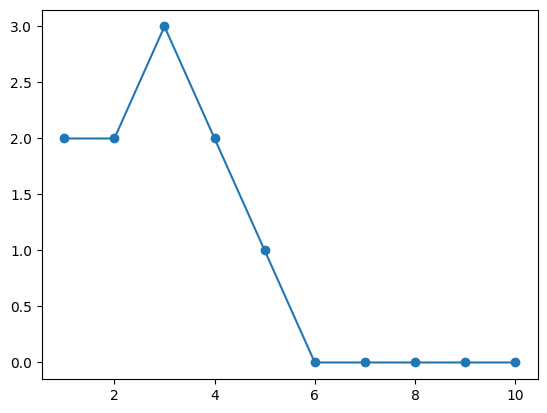

In [7]:
ppn = Perceptron()
ppn.fit(X,Y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

In [8]:
i1 = [5.5, 1.6]
i2 = [6.4, 4.5]
R1 = ppn.predict(i1)
R2 = ppn.predict(i2)

if (R2==1):
    print('setosa')
else:
    print('versicolor')

setosa


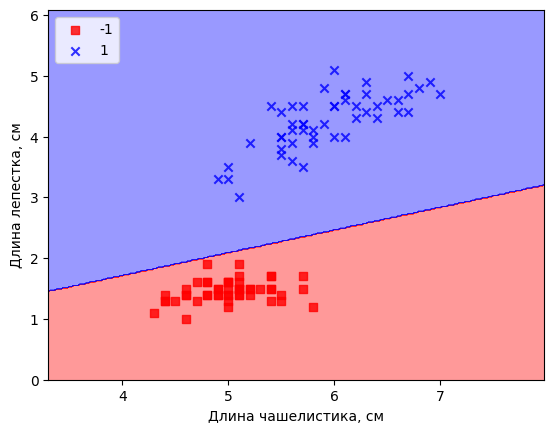

In [9]:
# Визуализация разделительной границы
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
# Настро ить генерато р маркеров и палитру
    markers = ('s', 'x', ' o', '^', 'v')
    colors = ( 'red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Вывести поверхность решения
    xl_min, xl_max = X[:, 0] .min() - 1, X[:, 0] .max() + 1
    x2_min, x2_max = X[:, 1] .min() - 1, X[:, 1] .max() + 1
    xxl, xx2 = np.meshgrid(np.arange(xl_min, xl_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xxl.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xxl.shape)
    plt.contourf(xxl, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xxl.min (), xxl.max())
    plt.ylim(xx2.min(), xx2.max())
    # По казать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            color=cmap(idx), marker=markers[idx], label=cl)

# Нарисовать картинку
plot_decision_regions(X, Y, classifier=ppn)
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Длина лепестка, см')
plt.legend(loc='upper left')
plt.show()